In [1]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.waveform import SchwarzschildEccentricWaveformBase
from few.summation.interpolatedmodesum import InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

In [2]:
use_gpu = False

# keyword arguments for inspiral generator (RunSchwarzEccFluxInspiral)
inspiral_kwargs={
        "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
        "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    }

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    "use_gpu": use_gpu  # GPU is available in this class
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": False  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform

few = FastSchwarzschildEccentricFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    use_gpu=use_gpu,
)

# Fig 3 from the article

In [3]:
# parameters
import numpy as np
M = 1e60
mu = 1e1
p0 = 12.0
e0 = 0.0
theta = 0  # polar viewing angle
phi =0 # azimuthal viewing angle
dt =10
wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1)  #

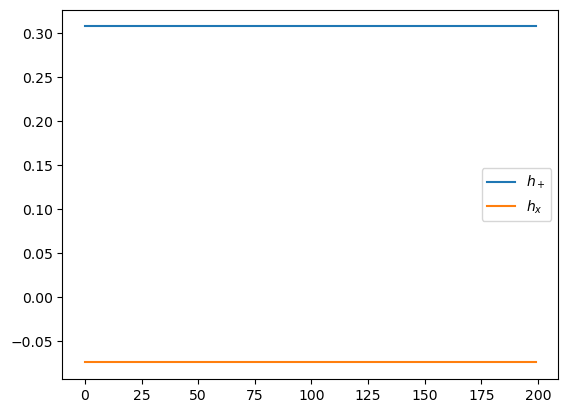

In [4]:

import matplotlib.pyplot as plt

dt = 10
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show()

In [5]:

theta = np.pi/4  # polar viewing angle
phi =0  # azimuthal viewing angle
dt = 10.0

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1)  #

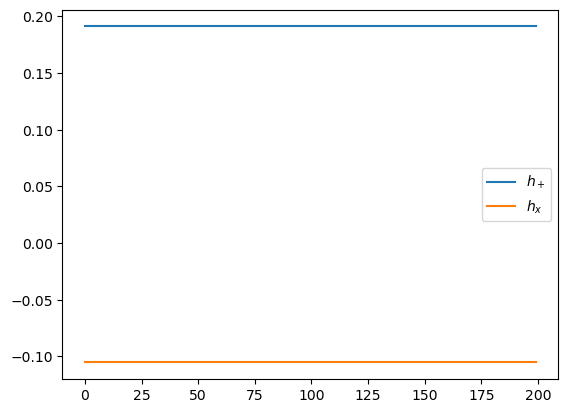

In [6]:

import matplotlib.pyplot as plt

dt = 10
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show()

In [7]:
theta = np.pi/2  # polar viewing angle
phi =np.pi/4 # azimuthal viewing angle
dt = 10

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1)  #

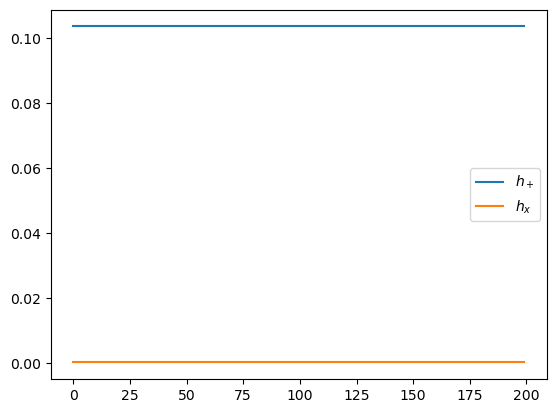

In [8]:

import matplotlib.pyplot as plt

dt = 10
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show()

In [9]:
M = 1e6
mu = 1e-2
p0 = 6.15
e0 = 0.0
theta = 0  # polar viewing angle
phi =0 # azimuthal viewing angle
dt = 5

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1)  #
wave=wave/M

numpy.ndarray

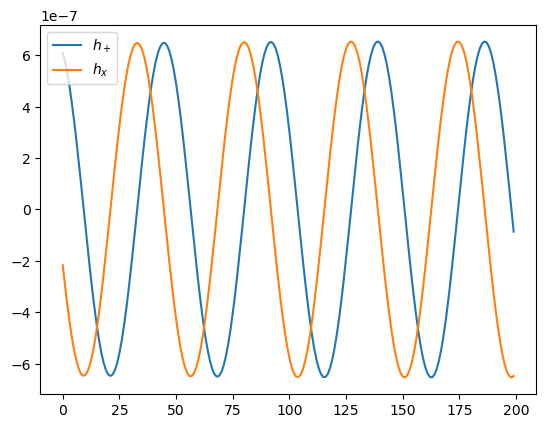

In [10]:
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show

type (wave)

In [11]:
M = 1e6
mu = 1e-2
p0 = 6.15
e0 = 0.0
theta = np.pi/4  # polar viewing angle
phi =0# azimuthal viewing angle


wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1)  #
wave=wave/M

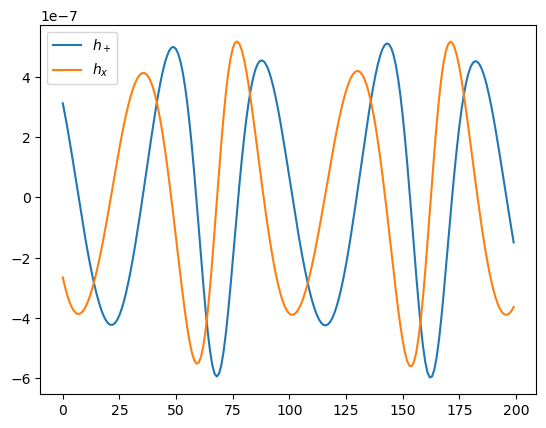

In [12]:
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show()

In [13]:
M = 1e6
mu = 1e-20
p0 = 6.15
e0 = 0.0
theta = np.pi/2  # polar viewing angle
phi =0# azimuthal viewing angle

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1)  #

wave=wave/M
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

<function matplotlib.pyplot.show(close=None, block=None)>

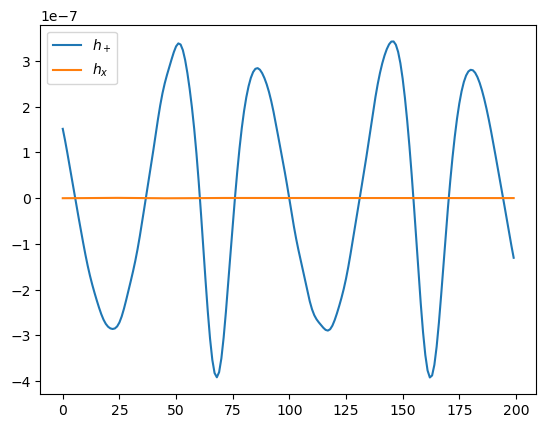

In [14]:
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:200],label=r'$h_+$')
plt.plot(wave.imag[:200],label=r'$h_x$')
plt.legend()
plt.show

In [32]:
dt=5
def ploth(m, mu, theta, phi):

    p0 = 6.15
    
    e0 = 0.0
    
    wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=1)  #
    
    # wave=wave*p0 /mu
    # t = np.arange(len(wave)) * dt
    
    plt.plot(wave.real[:200],label=r'$h_+$')
    plt.plot(wave.imag[:200],label=r'$h_x$')
    plt.legend()
    plt.show

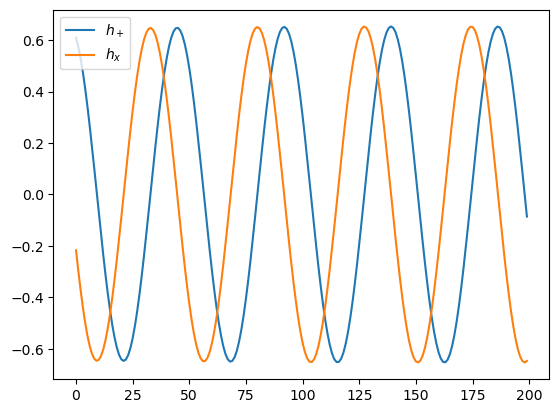

In [33]:
M = 1e6 
mu = 1e-2
ploth(M, mu, 0,0)

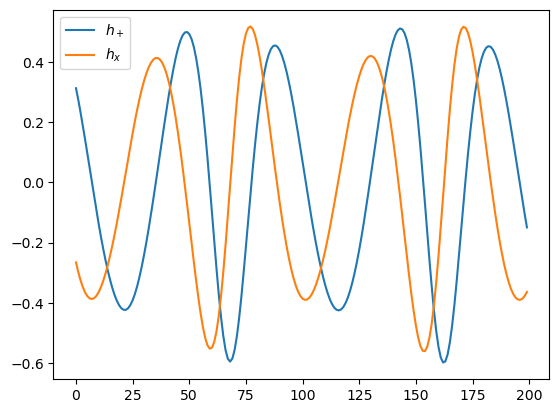

In [34]:
ploth(M, mu,np.pi*1/4,0)

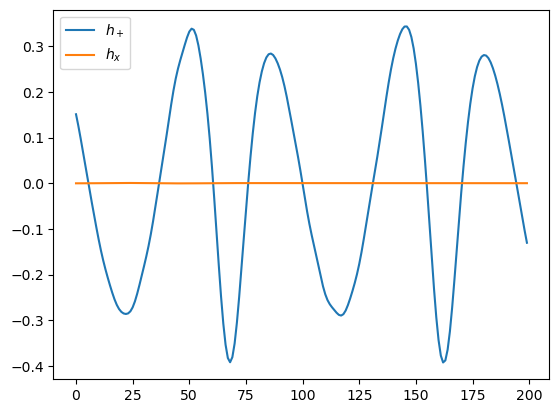

In [35]:
ploth(M, mu,np.pi/2,0)